In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
from collections import OrderedDict
from statistics import variance

from libs.commpy_mod import SISOFlatChannel

from files_01_detection.qam_crazy import crazy_channel_propagate
from files_01_detection.const_mod import generate_symbols, Model
from files_01_detection.const_analyzer import plot_decision_boundary, theoretical_error, ser, plot_confusion_matrix, plot_symbols
 
%matplotlib inline

2023-02-13 16:50:34.245380: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-13 16:50:34.245404: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-13 16:50:34.275337: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-02-13 16:50:34.982162: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-13 16:50:34.982240: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: ca

In [2]:
Mod = 'QAM'
channel_type = 'rayleigh' # 'awgn' or 'crazy' or 'rayleigh'
M            = 64      # PSK modulation
total_num_symbols  = 100000    # Number of transmitted symbols to be used for training and test
train_fraction = 0.8 # Fraction of whole data to be used for training (the remaining is for testing)
SNR_dB       = 30      # Signal to noise ratio in dB     
code_rate    = 1       # Rate of the used code
Es           = 1       # Average symbol energy

In [3]:
symbs, indices, channel_output = Model(Mod, total_num_symbols, M, channel_type, Es, code_rate, SNR_dB)

In [4]:
channel_output

(array([ 1.11937273+0.6751243j ,  0.2362511 +0.23553692j,
        -0.50116535+0.10695425j, ...,  0.21758633-0.18863486j,
         0.74634572-0.74268851j, -0.12683761-0.32396767j]),
 array([1.44942384, 1.45821039, 0.68851668, ..., 1.1944739 , 1.58140415,
        0.67460309]))

In [5]:
symbs_ = symbs[:]

In [6]:
indices = list(OrderedDict.fromkeys(indices))

In [7]:
symbs = np.array(list(OrderedDict.fromkeys(symbs))).reshape(1,-1)

In [8]:
np.sum(np.abs(symbs)**2)/M

1.0

In [9]:
alph = channel_output[1]

In [11]:
np.mean(alph ** 2)

0.9956056976154347

In [12]:
variance(alph)

0.21417888902773674

In [11]:
channel_output = channel_output[0].reshape(-1,1)

In [152]:
d = dict(zip(symbs[0], indices))

In [153]:
d

{(0.7071067811865475-0.7071067811865475j): 2,
 (-0.7071067811865475-0.7071067811865475j): 0,
 (0.7071067811865475+0.7071067811865475j): 3,
 (-0.7071067811865475+0.7071067811865475j): 1}

In [154]:
input = []
for i in range(total_num_symbols):
    input.append(d[symbs_[i]])

In [164]:
symb_min = [[],[]]
for a, desv in zip(channel_output, alph):
    print(np.abs(a - symbs), "=",np.argmin(np.abs(np.array(a) - symbs)),"--", np.abs(np.array(a) - np.array(desv) * symbs),np.argmin(np.abs(a - desv * symbs)), "\n")
    symb_min[0].append(symbs[0, np.argmin(np.abs(a - symbs))])
    symb_min[1].append(symbs[0, np.argmin(np.abs(a - desv * symbs))])

[[0.21183659 1.27275546 1.27377416 1.78816452]] = 0 -- [[7.18080153e-04 1.11395642e+00 1.11487341e+00 1.57602066e+00]] 0 

[[1.23550204 0.26197522 1.73821363 1.25042087]] = 1 -- [[1.04706773 0.01651342 1.49007148 1.06029942]] 1 

[[1.60944979 2.25853871 0.25855627 1.60546561]] = 2 -- [[1.79834087 2.53990463 0.02305322 1.79377176]] 2 

[[1.20863568 0.29904848 1.70143498 1.23430579]] = 1 -- [[0.97198689 0.02020434 1.39006923 0.99395279]] 1 

[[1.47696441 0.08896049 2.08893494 1.47991191]] = 1 -- [[1.54647175 0.01154095 2.18920209 1.54956901]] 1 

[[0.54904035 1.10037127 1.09360071 1.45097696]] = 0 -- [[0.02183824 0.62530664 0.62018476 0.88043207]] 0 

[[1.86220998 1.2911227  1.3495981  0.14348109]] = 3 -- [[1.73006481 1.19596065 1.25073133 0.03907001]] 3 

[[1.74405932 2.43685109 0.43697371 1.75711307]] = 2 -- [[1.99927085 2.83846015 0.03701887 2.01522765]] 2 



In [ ]:
np.abs(channel_output[2] - )

In [129]:
symb_min[0]

[(-0.7071067811865475-0.7071067811865475j),
 (-0.7071067811865475-0.7071067811865475j),
 (-0.7071067811865475-0.7071067811865475j),
 (0.7071067811865475-0.7071067811865475j),
 (0.7071067811865475-0.7071067811865475j),
 (-0.7071067811865475+0.7071067811865475j),
 (-0.7071067811865475-0.7071067811865475j),
 (0.7071067811865475+0.7071067811865475j),
 (0.7071067811865475+0.7071067811865475j),
 (-0.7071067811865475-0.7071067811865475j),
 (0.7071067811865475-0.7071067811865475j),
 (-0.7071067811865475-0.7071067811865475j),
 (0.7071067811865475+0.7071067811865475j),
 (-0.7071067811865475-0.7071067811865475j),
 (-0.7071067811865475-0.7071067811865475j),
 (0.7071067811865475+0.7071067811865475j),
 (0.7071067811865475-0.7071067811865475j),
 (-0.7071067811865475+0.7071067811865475j),
 (-0.7071067811865475-0.7071067811865475j),
 (-0.7071067811865475+0.7071067811865475j),
 (0.7071067811865475-0.7071067811865475j),
 (0.7071067811865475-0.7071067811865475j),
 (-0.7071067811865475-0.7071067811865475j)

In [130]:
symb_min[1]

[(-0.7071067811865475-0.7071067811865475j),
 (-0.7071067811865475-0.7071067811865475j),
 (-0.7071067811865475-0.7071067811865475j),
 (0.7071067811865475-0.7071067811865475j),
 (0.7071067811865475-0.7071067811865475j),
 (-0.7071067811865475+0.7071067811865475j),
 (-0.7071067811865475-0.7071067811865475j),
 (0.7071067811865475+0.7071067811865475j),
 (0.7071067811865475+0.7071067811865475j),
 (-0.7071067811865475-0.7071067811865475j),
 (0.7071067811865475-0.7071067811865475j),
 (-0.7071067811865475-0.7071067811865475j),
 (0.7071067811865475+0.7071067811865475j),
 (-0.7071067811865475-0.7071067811865475j),
 (-0.7071067811865475-0.7071067811865475j),
 (0.7071067811865475+0.7071067811865475j),
 (0.7071067811865475-0.7071067811865475j),
 (-0.7071067811865475+0.7071067811865475j),
 (-0.7071067811865475-0.7071067811865475j),
 (-0.7071067811865475+0.7071067811865475j),
 (0.7071067811865475-0.7071067811865475j),
 (0.7071067811865475-0.7071067811865475j),
 (-0.7071067811865475-0.7071067811865475j)

In [75]:
output = [[],[]]
for i in range(total_num_symbols):
    output[0].append(d[symb_min[0][i]])
    output[1].append(d[symb_min[1][i]])

IndexError: invalid index to scalar variable.

In [60]:
output_ = []
for i in range(total_num_symbols):
    output_.append(d[symb_min_[i]])

In [54]:
symb_min_ = []
for a in channel_output:
    symb_min_.append(symbs[0, np.argmin(np.abs(a - symbs))])

In [ ]:
output

In [20]:
np.array(input) != np.array(output)

array([False, False, False, ..., False, False, False])

In [3]:
def error_symb(Mod, total_num_symbols, M, channel_type, Es, code_rate, SNR_dB, desv_test):
    symbs, indices, channel_output = Model(Mod, total_num_symbols, M, channel_type, Es, code_rate, SNR_dB)
    symbs_ = symbs[:]
    indices = list(OrderedDict.fromkeys(indices))
    symbs = np.array(list(OrderedDict.fromkeys(symbs))).reshape(1,-1)
    alph = channel_output[1]

    channel_output = channel_output[0].reshape(-1,1)
    
    d = dict(zip(symbs[0], indices))
    
    input = []
    for i in range(total_num_symbols):
        input.append(d[symbs_[i]])

    if desv_test:
        symb_min = [[],[]]
        for a, desv in zip(channel_output, alph):
            symb_min[0].append(symbs[0, np.argmin(np.abs(a - symbs))])    
            symb_min[1].append(symbs[0, np.argmin(np.abs(a - desv * symbs))])
        
        output = [[],[]]
        for i in range(total_num_symbols):
            output[0].append(d[symb_min[0][i]])
            output[1].append(d[symb_min[1][i]])

        return [np.sum(np.array(input) != np.array(out)) for out in output] / np.array(total_num_symbols)
    else:
        symb_min = []
        for a, desv in zip(channel_output, alph):
            symb_min.append(symbs[0, np.argmin(np.abs(a - desv * symbs))])
        
        output = []
        for i in range(total_num_symbols):
            output.append(d[symb_min[i]])

        return np.sum(np.array(input) != np.array(output)) / total_num_symbols

In [12]:
symbs, indices, channel_output = Model(Mod, 30000, M, channel_type, Es, code_rate, 50) 

In [20]:
np.average(channel_output ** 2)/len(channel_output) 

(0.0016095592486235447-0.001096672132294552j)

In [5]:
np.var(channel_output)

9.872710145606834e-06

In [14]:
symbs, indices, channel_output = Model(Mod, 30000, M, channel_type, Es, code_rate, 18) 

In [9]:
np.average(channel_output)

(-0.008453822278183467+0.0036049965325919532j)

In [10]:
np.var(channel_output)

1.0022622035555555

OBS: Realizar simulação com conhecimento do desvanecimento, e sem o conhecimento.

# Geração do gráfico

## PSK

### AWGN

In [4]:
theoretical_error(Mod, M, 25, channel_type, epb=False)

0.10578567989270096

In [14]:
Mod = "PSK"
M = 8
channel_type = "awgn"
init_scale = 2
interval = 17
passo = 2

In [15]:
Teo_SNRs = [theoretical_error(Mod, M, init_scale + i, channel_type, epb=True) for i in range(0, interval, passo)]

In [16]:
error_rate = np.array([error_symb(Mod, int(100 / (Teo_SNRs[int(i / passo)] * np.log2(M))), M, channel_type, Es, code_rate, init_scale + i, True) for i in range(0, interval, passo)]).T / np.log2(M)

In [17]:
error_rate

array([[1.82266010e-01, 1.23697917e-01, 8.68347339e-02, 5.16840883e-02,
        3.53930954e-02, 1.01924077e-02, 2.33800935e-03, 2.19214234e-04,
        5.55061436e-06],
       [1.82266010e-01, 1.23697917e-01, 8.68347339e-02, 5.16840883e-02,
        3.53930954e-02, 1.01924077e-02, 2.33800935e-03, 2.19214234e-04,
        5.55061436e-06]])

In [18]:
np.mean(error_rate[1] - Teo_SNRs)

0.0006643993785584434

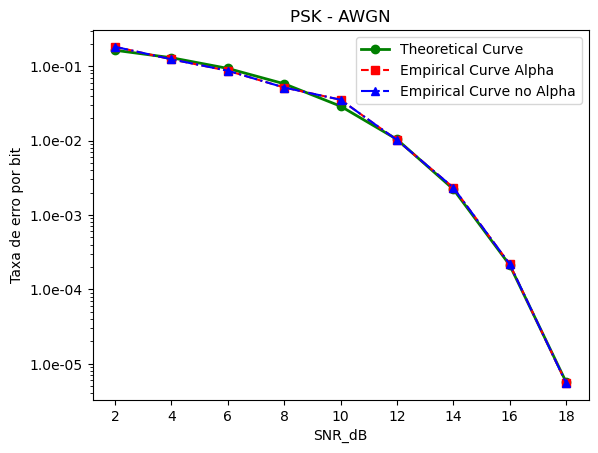

In [19]:
import matplotlib.ticker as tick

y1 = Teo_SNRs
x = range(init_scale, init_scale + interval, passo)
y2 = error_rate[1]
y3 = error_rate[0]

fig, ax = plt.subplots(1,1)

ax.plot(x, y1, 'go-', label='Theoretical Curve', linewidth=2)
ax.plot(x, y2, 'rs--', label='Empirical Curve Alpha')
ax.plot(x, y3, 'b^-.', label='Empirical Curve no Alpha')

ax.set_title('8-PSK - AWGN')
ax.set_xlabel('SNR_dB')
ax.set_ylabel('Taxa de erro por bit')

def y_fmt(x, y):
    return '{:2.1e}'.format(x)

ax.set_yscale("log")
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))
#plt.plot(x2, y2, 'rs--',  label='line 2')

plt.legend()
plt.show()

### Rayleigh

In [20]:
Mod = "PSK"
channel_type = "rayleigh"
M = 8
Es = 1
code_rate = 1
init_scale = 2
interval = 50
passo = 4

In [21]:
Teo_SNRs = [theoretical_error(Mod, M, init_scale + i, channel_type, epb=True) for i in range(0, interval, passo)]

In [22]:
error_rate = np.array([error_symb(Mod, int(200 / (Teo_SNRs[int(i / passo)] * np.log2(M))), M, channel_type, Es, code_rate, init_scale + i, True) for i in range(0, interval, passo)]).T / np.log2(M)

In [23]:
error_rate

array([[1.86024551e-01, 1.19422572e-01, 7.33944954e-02, 3.73937677e-02,
        1.63619668e-02, 6.26108734e-03, 3.02003951e-03, 1.13228484e-03,
        4.86066838e-04, 1.75720318e-04, 6.96307846e-05, 2.44387973e-05,
        9.84381227e-06],
       [1.86024551e-01, 1.19422572e-01, 7.33944954e-02, 3.73937677e-02,
        1.63619668e-02, 6.26108734e-03, 3.02003951e-03, 1.13228484e-03,
        4.86066838e-04, 1.75720318e-04, 6.96307846e-05, 2.44387973e-05,
        9.84381227e-06]])

In [24]:
np.mean(error_rate[1] - Teo_SNRs)

-0.0014164737397529441

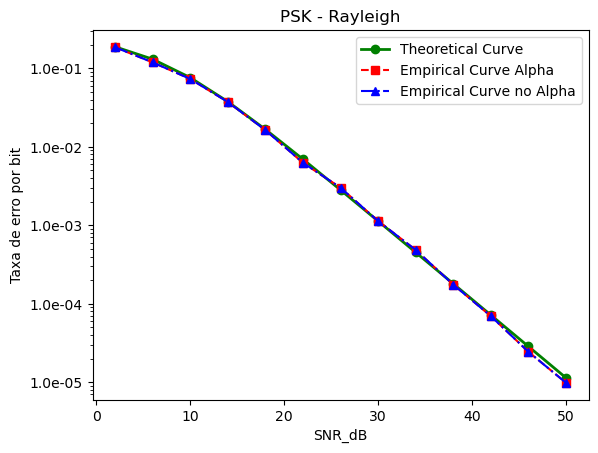

In [25]:
import matplotlib.ticker as tick

y1 = Teo_SNRs
x = range(init_scale, init_scale + interval, passo)
y2 = error_rate[1]
y3 = error_rate[0]

fig, ax = plt.subplots(1,1)

ax.plot(x, y1, 'go-', label='Theoretical Curve', linewidth=2)
ax.plot(x, y2, 'rs--', label='Empirical Curve Alpha')
ax.plot(x, y3, 'b^-.', label='Empirical Curve no Alpha')

ax.set_title('8-PSK - Rayleigh')
ax.set_xlabel('SNR_dB')
ax.set_ylabel('Taxa de erro por bit')

def y_fmt(x, y):
    return '{:2.1e}'.format(x)

ax.set_yscale("log")
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))
#plt.plot(x2, y2, 'rs--',  label='line 2')

plt.legend()
plt.show()

## QAM
### AWGN

In [26]:
Mod = "QAM"
channel_type = "awgn"
Es = 1
code_rate = 1
M = 16
init_scale = 2
interval = 19
passo = 3

In [27]:
Teo_SNRs = [theoretical_error(Mod, M, init_scale + i, channel_type, epb=True) for i in range(0, interval, passo)]

In [28]:
error_rate = np.array([error_symb(Mod, int(100 / (Teo_SNRs[int(i / passo)] * np.log2(M))), M, channel_type, Es, code_rate, init_scale + i, True) for i in range(0, interval, passo)]).T / np.log2(M)

In [29]:
error_rate

array([[1.80743243e-01, 1.25000000e-01, 8.06737589e-02, 4.04530744e-02,
        8.36120401e-03, 4.74921812e-04, 3.22352104e-06],
       [1.80743243e-01, 1.25000000e-01, 8.06737589e-02, 4.04530744e-02,
        8.36120401e-03, 4.74921812e-04, 3.22352104e-06]])

In [30]:
np.mean(error_rate[1] - Teo_SNRs)

-0.0008734835485390895

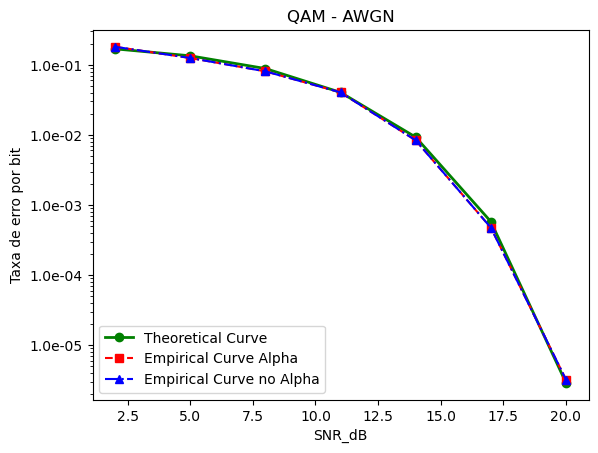

In [31]:
import matplotlib.ticker as tick

y1 = Teo_SNRs
x = range(init_scale, init_scale + interval, passo)
y2 = error_rate[1]
y3 = error_rate[0]

fig, ax = plt.subplots(1,1)

ax.plot(x, y1, 'go-', label='Theoretical Curve', linewidth=2)
ax.plot(x, y2, 'rs--', label='Empirical Curve Alpha')
ax.plot(x, y3, 'b^-.', label='Empirical Curve no Alpha')

ax.set_title('16-QAM - AWGN')
ax.set_xlabel('SNR_dB')
ax.set_ylabel('Taxa de erro por bit')

def y_fmt(x, y):
    return '{:2.1e}'.format(x)

ax.set_yscale("log")
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))
#plt.plot(x2, y2, 'rs--',  label='line 2')

plt.legend()
plt.show()

### Rayleigh

In [32]:
Mod = "QAM"
channel_type = "rayleigh"
init_scale = 2
interval = 48
passo = 4

In [33]:
Teo_SNRs = [theoretical_error(Mod, M, init_scale + i, channel_type, epb=True) for i in range(0, interval, passo)]

In [34]:
error_rate = np.array([error_symb(Mod, int(100 / (Teo_SNRs[int(i / passo)] * np.log2(M))), M, channel_type, Es, code_rate, init_scale + i, True) for i in range(0, interval, passo)]).T / np.log2(M)

In [35]:
error_rate

array([[1.90476190e-01, 1.30281690e-01, 1.14537445e-01, 8.85416667e-02,
        7.68617021e-02, 7.65144665e-02, 7.41631219e-02, 7.24335591e-02,
        7.06513649e-02, 7.10193881e-02, 7.09207782e-02, 7.08605430e-02],
       [1.80952381e-01, 1.28521127e-01, 9.25110132e-02, 4.97685185e-02,
        2.12765957e-02, 9.15461121e-03, 3.69890882e-03, 1.56331423e-03,
        7.51689441e-04, 2.13708193e-04, 1.07606223e-04, 4.09674728e-05]])

In [36]:
np.mean(error_rate[1] - Teo_SNRs)

-0.011325091026519333

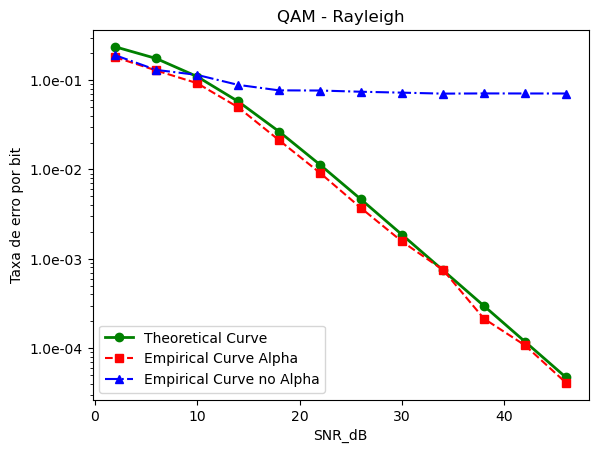

In [37]:
import matplotlib.ticker as tick

y1 = Teo_SNRs
x = range(init_scale, init_scale + interval, passo)
y2 = error_rate[1]
y3 = error_rate[0]

fig, ax = plt.subplots(1,1)

ax.plot(x, y1, 'go-', label='Theoretical Curve', linewidth=2)
ax.plot(x, y2, 'rs--', label='Empirical Curve Alpha')
ax.plot(x, y3, 'b^-.', label='Empirical Curve no Alpha')

ax.set_title('16-QAM - Rayleigh')
ax.set_xlabel('SNR_dB')
ax.set_ylabel('Taxa de erro por bit')

def y_fmt(x, y):
    return '{:2.1e}'.format(x)

ax.set_yscale("log")
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))
#plt.plot(x2, y2, 'rs--',  label='line 2')

plt.legend()
plt.show()